In [1]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
X = boston.data
Y = boston.target

In [4]:
print(X.shape)
print(Y.shape)

(506, 13)
(506,)


In [5]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [8]:
import pandas as pd
df = pd.DataFrame(X)
df.columns = boston.feature_names #Changing the name of columns which were in number
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [10]:
import numpy as np
u = np.mean(X,axis=0)
std = np.std(X,axis=0) 
#Does mean and std column wise, so we get mean and std of every feature. For doing row wise we can take axis = 1
print(u.shape,std.shape)

(13,) (13,)


In [11]:
#Now we need to normalize every point so we can simply apply the formula
X= (X-u)/std

In [13]:
print(X[:5,:]) #First five rows and all columns as you can see

[[-0.41771335  0.28482986 -1.2879095  -0.27259857 -0.14421743  0.41367189
  -0.12001342  0.1402136  -0.98284286 -0.66660821 -1.45900038  0.44105193
  -1.0755623 ]
 [-0.41526932 -0.48772236 -0.59338101 -0.27259857 -0.74026221  0.19427445
   0.36716642  0.55715988 -0.8678825  -0.98732948 -0.30309415  0.44105193
  -0.49243937]
 [-0.41527165 -0.48772236 -0.59338101 -0.27259857 -0.74026221  1.28271368
  -0.26581176  0.55715988 -0.8678825  -0.98732948 -0.30309415  0.39642699
  -1.2087274 ]
 [-0.41468015 -0.48772236 -1.30687771 -0.27259857 -0.83528384  1.01630251
  -0.80988851  1.07773662 -0.75292215 -1.10611514  0.1130321   0.41616284
  -1.36151682]
 [-0.41040922 -0.48772236 -1.30687771 -0.27259857 -0.83528384  1.22857665
  -0.51117971  1.07773662 -0.75292215 -1.10611514  0.1130321   0.44105193
  -1.02650148]]


In [14]:
pd.DataFrame(X[:5,:]).head() #Converted first five rows into a dataframe so we can use accordingly

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.417713,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.415269,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.415272,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.414680,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.410409,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


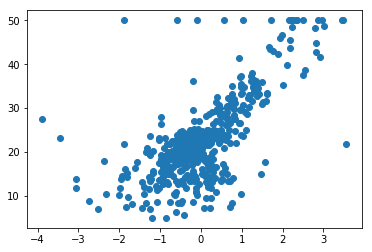

In [16]:
#Simple plot
import matplotlib.pyplot as plt
plt.scatter(X[:,5],Y)
plt.show()
#Y is the target and we have tried to find the relation between 5th column of dataset and target
#Now there is some relation but it is not enough so we need all the 13 variables

In [18]:
#We need to add a dummy column of ones so we can multiply with Theta0
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
print(X.shape)
#One column added

(506, 14)


In [28]:
# X will be the whole matrix with all features and all targets
#x will give a single row with all the features which will give a single result
def hypothesis(x,theta):
    y_=0.0
    n=x.shape[0]
    for i in range(n):
        y_+= (theta[i]*x[i])
    return y_
#Predicted value of y by multiplying theta with values of variables
def error(X,Y,theta):
    e=0.0
    m=X.shape[0]
    for i in range(m):
        y_=hypothesis(X[i],theta)
        e+=(y_-Y[i])**2
    return e/m
#Calculating errors
def gradient(X,Y,theta):
    m,n =X.shape
    grad = np.zeros((n,))
    for j in range(n):
        #sum of all examples
        for i in range(m):
            y_=hypothesis(X[i],theta)
            grad[j]+=(y_-Y[i])*X[i][j]
    return grad/m
#Calculate grdient
def GD(X,Y, learning_rate = 0.1, max_epochs = 300):
    m,n=X.shape
    theta = np.zeros((n,))
    error_list = []
    for i in range(max_epochs):
        e= error(X,Y,theta)
        error_list.append(e)
        grad = gradient(X,Y,theta)
        for j in range(n):
            theta[j]=theta[j]-(learning_rate*grad[j])
    return theta,error_list

In [29]:
theta,error_list = GD(X,Y)

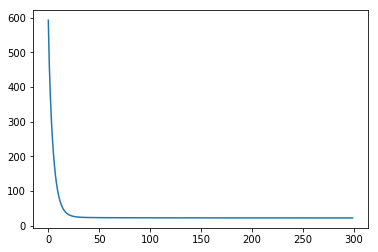

In [32]:
import matplotlib.pyplot as plt
plt.plot(error_list)

In [34]:
pred=[]
for i in range(X.shape[0]):
    predy = hypothesis(X[i],theta)
    pred.append(predy)
pred = np.array(pred)

In [37]:
def r2score(Y,pred):
    num = np.sum((Y-pred)**2)
    denom = np.sum((Y-Y.mean())**2)
    score = (1-(num/denom))
    return score
print(r2score(Y,pred))
#Poor scoring because we have only considered in linear

0.7404193712282287
